Problem statement-PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
df=pd.read_csv('forestfires.csv')

In [4]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = preprocessing.LabelEncoder()

In [10]:
label_encoder.fit(df['size_category'])

LabelEncoder()

In [11]:
label_encoder.classes_

array(['large', 'small'], dtype=object)

In [12]:
df['encoded_size_category']=label_encoder.transform(df['size_category'])
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,encoded_size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,1


In [13]:
df.drop(columns=['month','day','size_category'],axis=1,inplace=True)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,encoded_size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


C:\Users\sanjana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

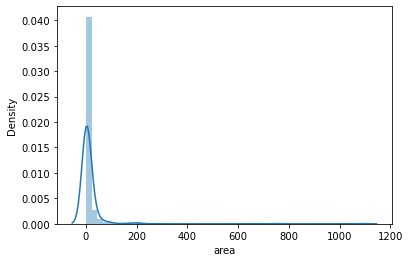

In [14]:
sns.distplot(df['area'])

In [15]:
# From the above graph we can say that Most of area values lies between 0 to 200 and there are many outliers 

In [16]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,encoded_size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


In [17]:
df.corr()['area'].sort_values()

encoded_size_category   -0.311322
RH                      -0.075519
dayfri                  -0.052911
monthmar                -0.045596
daymon                  -0.021206
monthfeb                -0.020732
daysun                  -0.020463
monthjun                -0.020314
monthoct                -0.016878
monthjan                -0.012589
daywed                  -0.011452
monthnov                -0.008893
monthapr                -0.008280
rain                    -0.007366
monthaug                -0.004187
daytue                  -0.001333
monthdec                 0.001010
monthjul                 0.006149
monthmay                 0.006264
ISI                      0.008258
wind                     0.012317
daythu                   0.020121
FFMC                     0.040122
DC                       0.049383
monthsep                 0.056573
DMC                      0.072994
daysat                   0.087868
temp                     0.097844
area                     1.000000
Name: area, dt

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.drop(['area'],axis=1).values
Y= df['area'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
import numpy as np

In [25]:
Y = np.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [26]:
# create model
model = Sequential()
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))

In [37]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
model.fit(X_train, y_train , epochs=600, batch_size=128)

Epoch 1/600
4/4 [==============================] - 1s 3ms/step - loss: 2021.9924
Epoch 2/600
4/4 [==============================] - 0s 2ms/step - loss: 2010.2845
Epoch 3/600
4/4 [==============================] - 0s 4ms/step - loss: 1998.2520
Epoch 4/600
4/4 [==============================] - 0s 2ms/step - loss: 1990.5068
Epoch 5/600
4/4 [==============================] - 0s 2ms/step - loss: 1980.0477
Epoch 6/600
4/4 [==============================] - 0s 2ms/step - loss: 1970.4210
Epoch 7/600
4/4 [==============================] - 0s 2ms/step - loss: 1963.2300
Epoch 8/600
4/4 [==============================] - 0s 3ms/step - loss: 1956.0979
Epoch 9/600
4/4 [==============================] - 0s 3ms/step - loss: 1946.7163
Epoch 10/600
4/4 [==============================] - 0s 2ms/step - loss: 1936.5447
Epoch 11/600
4/4 [==============================] - 0s 2ms/step - loss: 1925.8831
Epoch 12/600
4/4 [==============================] - 0s 3ms/step - loss: 1913.9413
Epoch 13/600
4/4 [=======

4/4 [==============================] - 0s 3ms/step - loss: 1043.1373
Epoch 101/600
4/4 [==============================] - 0s 2ms/step - loss: 1054.7109
Epoch 102/600
4/4 [==============================] - 0s 2ms/step - loss: 1050.8590
Epoch 103/600
4/4 [==============================] - 0s 2ms/step - loss: 1015.3956
Epoch 104/600
4/4 [==============================] - 0s 2ms/step - loss: 1024.2142
Epoch 105/600
4/4 [==============================] - 0s 3ms/step - loss: 1027.1970
Epoch 106/600
4/4 [==============================] - 0s 3ms/step - loss: 1015.2418
Epoch 107/600
4/4 [==============================] - 0s 2ms/step - loss: 1023.3267
Epoch 108/600
4/4 [==============================] - 0s 1ms/step - loss: 989.4248
Epoch 109/600
4/4 [==============================] - 0s 3ms/step - loss: 990.1973
Epoch 110/600
4/4 [==============================] - 0s 2ms/step - loss: 975.3106
Epoch 111/600
4/4 [==============================] - 0s 2ms/step - loss: 971.6235
Epoch 112/600
4/4 [===

4/4 [==============================] - 0s 3ms/step - loss: 382.8157
Epoch 200/600
4/4 [==============================] - 0s 2ms/step - loss: 388.5230
Epoch 201/600
4/4 [==============================] - 0s 2ms/step - loss: 379.4067
Epoch 202/600
4/4 [==============================] - 0s 2ms/step - loss: 394.2198
Epoch 203/600
4/4 [==============================] - 0s 3ms/step - loss: 404.9442
Epoch 204/600
4/4 [==============================] - 0s 2ms/step - loss: 351.2467
Epoch 205/600
4/4 [==============================] - 0s 3ms/step - loss: 428.8571
Epoch 206/600
4/4 [==============================] - 0s 3ms/step - loss: 399.6780
Epoch 207/600
4/4 [==============================] - 0s 2ms/step - loss: 373.5853
Epoch 208/600
4/4 [==============================] - 0s 4ms/step - loss: 352.7896
Epoch 209/600
4/4 [==============================] - 0s 3ms/step - loss: 386.7856
Epoch 210/600
4/4 [==============================] - 0s 2ms/step - loss: 385.6009
Epoch 211/600
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 238.2295
Epoch 300/600
4/4 [==============================] - 0s 2ms/step - loss: 237.9947
Epoch 301/600
4/4 [==============================] - 0s 2ms/step - loss: 232.5038
Epoch 302/600
4/4 [==============================] - 0s 3ms/step - loss: 237.1769
Epoch 303/600
4/4 [==============================] - 0s 2ms/step - loss: 244.5800
Epoch 304/600
4/4 [==============================] - 0s 2ms/step - loss: 236.3156
Epoch 305/600
4/4 [==============================] - 0s 2ms/step - loss: 237.9908
Epoch 306/600
4/4 [==============================] - 0s 2ms/step - loss: 233.1818
Epoch 307/600
4/4 [==============================] - 0s 3ms/step - loss: 240.6932
Epoch 308/600
4/4 [==============================] - 0s 4ms/step - loss: 263.3995
Epoch 309/600
4/4 [==============================] - 0s 2ms/step - loss: 233.1518
Epoch 310/600
4/4 [==============================] - 0s 2ms/step - loss: 244.5702
Epoch 311/600
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 214.7935
Epoch 399/600
4/4 [==============================] - 0s 3ms/step - loss: 198.9598
Epoch 400/600
4/4 [==============================] - 0s 3ms/step - loss: 203.8337
Epoch 401/600
4/4 [==============================] - 0s 4ms/step - loss: 194.5716
Epoch 402/600
4/4 [==============================] - 0s 2ms/step - loss: 189.7249
Epoch 403/600
4/4 [==============================] - 0s 2ms/step - loss: 186.2543
Epoch 404/600
4/4 [==============================] - 0s 4ms/step - loss: 193.1499
Epoch 405/600
4/4 [==============================] - 0s 3ms/step - loss: 180.8134
Epoch 406/600
4/4 [==============================] - 0s 3ms/step - loss: 220.2791
Epoch 407/600
4/4 [==============================] - 0s 4ms/step - loss: 197.8457
Epoch 408/600
4/4 [==============================] - 0s 3ms/step - loss: 218.6195
Epoch 409/600
4/4 [==============================] - 0s 5ms/step - loss: 238.6964
Epoch 410/600
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 165.2338
Epoch 499/600
4/4 [==============================] - 0s 3ms/step - loss: 155.6494
Epoch 500/600
4/4 [==============================] - 0s 2ms/step - loss: 153.1598
Epoch 501/600
4/4 [==============================] - 0s 3ms/step - loss: 162.1070
Epoch 502/600
4/4 [==============================] - 0s 3ms/step - loss: 163.4016
Epoch 503/600
4/4 [==============================] - 0s 2ms/step - loss: 155.1604
Epoch 504/600
4/4 [==============================] - 0s 3ms/step - loss: 155.1031
Epoch 505/600
4/4 [==============================] - 0s 3ms/step - loss: 155.7973
Epoch 506/600
4/4 [==============================] - 0s 2ms/step - loss: 155.5212
Epoch 507/600
4/4 [==============================] - 0s 3ms/step - loss: 155.1597
Epoch 508/600
4/4 [==============================] - 0s 3ms/step - loss: 160.3387
Epoch 509/600
4/4 [==============================] - 0s 2ms/step - loss: 161.6849
Epoch 510/600
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 138.6516
Epoch 599/600
4/4 [==============================] - 0s 3ms/step - loss: 147.6343
Epoch 600/600
4/4 [==============================] - 0s 3ms/step - loss: 146.6689


In [39]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4.20e+01 2.74e+01]
 [0.00e+00 0.00e+00]
 [0.00e+00 2.18e+00]
 [0.00e+00 8.85e+01]
 [0.00e+00 2.69e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 1.94e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 1.63e+01]
 [0.00e+00 0.00e+00]
 [0.00e+00 2.47e+00]
 [0.00e+00 2.20e+01]
 [3.11e+02 1.01e+01]
 [0.00e+00 0.00e+00]
 [0.00e+00 1.83e+01]
 [0.00e+00 0.00e+00]
 [0.00e+00 1.56e+00]
 [0.00e+00 4.33e+01]
 [0.00e+00 1.10e+00]
 [0.00e+00 7.36e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 3.33e+00]
 [0.00e+00 4.62e+00]
 [0.00e+00 5.83e+00]
 [7.64e+01 7.08e+01]
 [0.00e+00 2.42e+01]
 [0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 3.20e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 8.59e+00]
 [0.00e+00 5.86e+00]
 [0.00e+00 1.96e+02]
 [0.00e+00 0.00e+00]
 [0.00e+00 1.56e+00]
 [7.28e+01 1.09e+03]
 [0.00e+00 0.00e+00]
 [0.00e+00 5.43e+01]
 [0.00e+00 0.00e+00]
 [0.00e+00 4.10e-01]
 [0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 1.69e+00]
 [1.56e+02 6.30e+00]
 [0.00e+00 0.

In [29]:
# evaluate the model
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.4778
accuracy: 47.78%


In [30]:
model.compile(loss="binary_crossentropy",
              optimizer='adam', metrics=["accuracy"])

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.figure(figsize=(200, 200))

In [ ]:
# we will only do scaling on train set 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
def baseline_model():
    model=Sequential()
    model.add(Dense(20,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(5,activation='relu'))
    
    model.add(Dense(1))
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae','accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
model = KerasRegressor(build_fn=baseline_model, nb_epoch=400, batch_size=100,verbose=0)
results=model.fit(X,Y)
y_pred=model.predict(X)


In [ ]:
fig,ax=plt.subplots()
ax.scatter(y_test,y_pred)
ax.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

No matter how many more observations we collect, a linear regression won’t be able to model the curves in that data! This is known as under-fitting.

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.figure(figsize=(200, 200))

In [ ]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=12, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=600, batch_size=128, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))



In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

In [ ]:
#smaller batch size longer training will take but we can avoid overfititng the model

In [ ]:
!pip install BayesianOptimization

In [ ]:
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = [ 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax']
    optimizerD= {'Adam':Adam(lr=learning_rate), 
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),}
    activationL = ['relu', 'tanh', 'elu', 'exponential', 'LeakyReLU','relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

In [ ]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_